In [42]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [43]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False)
        )
    
    def forward(self, x):
        return self.layers(x)

In [44]:
torch.manual_seed(3)

In [45]:
train_dataset = MNIST('./mnist_train/', train=True, download=True, transform=transforms.ToTensor())

In [46]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [47]:
test_dataset = MNIST('./mnist_test', train=False, download=True, transform=transforms.ToTensor())

In [48]:
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

In [49]:
torch.manual_seed(3)

In [50]:
mlp = MLP()

In [51]:
ce_loss = nn.CrossEntropyLoss()

In [52]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=1)

In [53]:
costs = []

In [54]:
print('Starting training...')
for epoch in range(0, 150):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = ce_loss(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i % 100 == 99:
            print('Loss after batch %5d: %.3f' % ((i+1)*128, current_loss))
            epoch_loss += current_loss
            current_loss = 0.0
    costs.append(epoch_loss)
print('Training completed')

Starting training...
Starting epoch 1
Loss after batch 12800: 171.606
Loss after batch 25600: 43.651
Loss after batch 38400: 34.283
Loss after batch 51200: 30.227
Starting epoch 2
Loss after batch 12800: 26.282
Loss after batch 25600: 25.214
Loss after batch 38400: 24.270
Loss after batch 51200: 21.757
Starting epoch 3
Loss after batch 12800: 19.908
Loss after batch 25600: 18.903
Loss after batch 38400: 18.461
Loss after batch 51200: 17.412
Starting epoch 4
Loss after batch 12800: 14.392
Loss after batch 25600: 15.704
Loss after batch 38400: 13.898
Loss after batch 51200: 15.314
Starting epoch 5
Loss after batch 12800: 12.868
Loss after batch 25600: 12.543
Loss after batch 38400: 11.796
Loss after batch 51200: 12.199
Starting epoch 6
Loss after batch 12800: 11.060
Loss after batch 25600: 10.618
Loss after batch 38400: 11.173
Loss after batch 51200: 10.478
Starting epoch 7
Loss after batch 12800: 9.334
Loss after batch 25600: 8.917
Loss after batch 38400: 9.703
Loss after batch 51200: 9

Loss after batch 12800: 0.360
Loss after batch 25600: 0.392
Loss after batch 38400: 0.396
Loss after batch 51200: 0.369
Starting epoch 61
Loss after batch 12800: 0.360
Loss after batch 25600: 0.368
Loss after batch 38400: 0.386
Loss after batch 51200: 0.361
Starting epoch 62
Loss after batch 12800: 0.344
Loss after batch 25600: 0.374
Loss after batch 38400: 0.359
Loss after batch 51200: 0.374
Starting epoch 63
Loss after batch 12800: 0.345
Loss after batch 25600: 0.334
Loss after batch 38400: 0.347
Loss after batch 51200: 0.357
Starting epoch 64
Loss after batch 12800: 0.335
Loss after batch 25600: 0.341
Loss after batch 38400: 0.336
Loss after batch 51200: 0.339
Starting epoch 65
Loss after batch 12800: 0.331
Loss after batch 25600: 0.327
Loss after batch 38400: 0.328
Loss after batch 51200: 0.341
Starting epoch 66
Loss after batch 12800: 0.304
Loss after batch 25600: 0.338
Loss after batch 38400: 0.315
Loss after batch 51200: 0.350
Starting epoch 67
Loss after batch 12800: 0.293
Loss

Loss after batch 38400: 0.128
Loss after batch 51200: 0.133
Starting epoch 120
Loss after batch 12800: 0.124
Loss after batch 25600: 0.128
Loss after batch 38400: 0.128
Loss after batch 51200: 0.126
Starting epoch 121
Loss after batch 12800: 0.116
Loss after batch 25600: 0.124
Loss after batch 38400: 0.121
Loss after batch 51200: 0.134
Starting epoch 122
Loss after batch 12800: 0.115
Loss after batch 25600: 0.131
Loss after batch 38400: 0.124
Loss after batch 51200: 0.127
Starting epoch 123
Loss after batch 12800: 0.116
Loss after batch 25600: 0.122
Loss after batch 38400: 0.130
Loss after batch 51200: 0.121
Starting epoch 124
Loss after batch 12800: 0.114
Loss after batch 25600: 0.116
Loss after batch 38400: 0.121
Loss after batch 51200: 0.129
Starting epoch 125
Loss after batch 12800: 0.117
Loss after batch 25600: 0.118
Loss after batch 38400: 0.127
Loss after batch 51200: 0.117
Starting epoch 126
Loss after batch 12800: 0.118
Loss after batch 25600: 0.120
Loss after batch 38400: 0.1

In [56]:
print('Starting testing...')
with torch.no_grad():
    correct = 0
    total = 0
    for i, data in enumerate(test_data_loader, 0):
        inputs, targets = data
        outputs = mlp(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
    print('Test Accuracy: {:.2f} %'.format(100 * correct / total))
    print('Test Error: {:.2f} %'.format(100 - (100*correct/total)))

Starting testing...
Test Accuracy: 98.15 %
Test Error: 1.85 %


In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

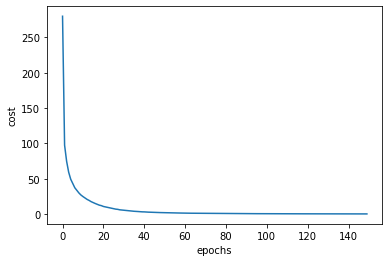

In [59]:
plot_cost()

In [ ]:
# Batch size = 128
# epochs = 150
# lr = 1

Starting testing...
Test Accuracy: 98.15 %
Test Error: 1.85 %